![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [3]:
# on importe pandas avec :
import pandas as pd
import numpy as np
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

In [2]:
ma_serie = pd.Series([3,6,8],index=["lundi","mardi","mercredi"])

In [3]:
ma_serie

lundi       3
mardi       6
mercredi    8
dtype: int64

In [4]:
ma_serie[ ["mardi","mercredi"] ]

mardi       6
mercredi    8
dtype: int64

In [5]:
ma_serie.iloc[1:3]

mardi       6
mercredi    8
dtype: int64

In [6]:
ma_serie[ma_serie >= 6]

mardi       6
mercredi    8
dtype: int64

# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

**Exercice :**
    
Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [7]:
ma_serie.name = "Series de jours"
ma_serie.index.name = "Jours"
ma_serie

Jours
lundi       3
mardi       6
mercredi    8
Name: Series de jours, dtype: int64

# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [8]:
pd.isna(pd.Series([2,np.nan,4],index=['a','b','c']))

a    False
b     True
c    False
dtype: bool

In [9]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c']))

a     True
b    False
c     True
dtype: bool

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format es dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

In [10]:
dates = pd.date_range(pd.datetime.today(),"2020-01-01")
serie_dates = pd.Series(np.random.randn(len(dates)),index=dates)

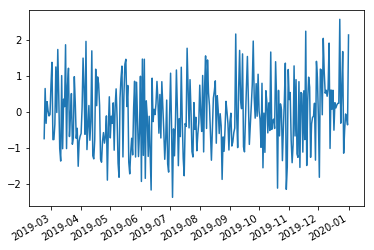

In [11]:
serie_dates.plot()

# Aller plus loin avec les dates

- On peut définir avec pandas des fuseaux horaires
    - On utilise `.tz_localize("Europe/Paris")`
    - On peut changer de fuseau horaire avec `.tz_convert()`

- On peut aussi travailler sur des périodes plutôt que sur des dates
    - On utilise `pd.period_range()`


# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [12]:
frame1=pd.DataFrame(np.random.randn(10).reshape(5,2),
             index=["obs_"+str(i) for i in range(5)],
             columns=["col_"+str(i) for i in range(2)])
frame1

,col_0,col_1
obs_0,0.719309,-1.028889
obs_1,-0.867425,0.445874
obs_2,0.053922,0.406056
obs_3,-1.932852,0.855492
obs_4,1.156922,-0.438442


# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [13]:
print(frame1.columns)

Index(['col_0', 'col_1'], dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


In [14]:
frame1["col_1"]

obs_0   -1.028889
obs_1    0.445874
obs_2    0.406056
obs_3    0.855492
obs_4   -0.438442
Name: col_1, dtype: float64

In [15]:
for col in frame1.columns:
    print(frame1[col].mean())

-0.17402506842819326
0.04801826136347555


In [16]:
frame1.mean()

col_0   -0.174025
col_1    0.048018
dtype: float64

In [17]:
frame1.loc["obs_1"]

col_0   -0.867425
col_1    0.445874
Name: obs_1, dtype: float64

# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [18]:
frame1.head(3)

,col_0,col_1
obs_0,0.719309,-1.028889
obs_1,-0.867425,0.445874
obs_2,0.053922,0.406056


Pour afficher un résumé du DF :

In [19]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, obs_0 to obs_4
Data columns (total 2 columns):
col_0    5 non-null float64
col_1    5 non-null float64
dtypes: float64(2)
memory usage: 280.0+ bytes


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [20]:
# afficher le répertoire de travail
%pwd

'C:\\Users\\s4d-asus-14\\Desktop\\python_slides_3days\\cle_fev_19'

In [ ]:
frame_airbnb = pd.read_csv("https://www.stat4decision.com/airbnb.csv",index_col = 0)

In [22]:
frame_airbnb["price_num"] = pd.to_numeric(frame_airbnb["price"].str[1:].str.replace(",",""))

In [23]:
frame_airbnb["price_num"] = frame_airbnb["price"].str[1:]
frame_airbnb["price_num"] = frame_airbnb["price_num"].str.replace(",","")
frame_airbnb["price_num"] = pd.to_numeric(frame_airbnb["price_num"])

In [25]:
# on peut maintenant calculer la moyenne
frame_airbnb["price_num"].max()

7790.0

In [28]:
# on peut extraire l'appartement le plus cher
frame_airbnb.loc[frame_airbnb["price_num"].idxmax()]

listing_url                                     https://www.airbnb.com/rooms/13649901
scrape_id                                                              20170404145355
last_scraped                                                               2017-04-05
name                                                   Eiffel Garden Triplex (117333)
summary                             In the supremely chic 16th arrondissement, the...
space                               In the supremely chic 16th arrondissement, the...
description                         In the supremely chic 16th arrondissement, the...
experiences_offered                                                              none
neighborhood_overview               Location: Paris 16th arrondissement, over view...
notes                               Rates are subject to change without prior noti...
transit                             Transfers and car rentals may be arranged. Ple...
access                              Activities: Walkin

# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <http://www.fdic.gov/bank/individual/failed/banklist.html>

In [29]:
bank = pd.read_html("http://www.fdic.gov/bank/individual/failed/banklist.html")

In [30]:
type(bank[0])

pandas.core.frame.DataFrame

In [31]:
bank[0].head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","February 1, 2019"
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017","February 21, 2018"
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","January 29, 2019"
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","March 22, 2018"
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","January 29, 2019"


In [32]:
# on récupère d'autres données depuis le web
nba = pd.read_html("https://en.wikipedia.org/wiki/List_of_all-time_NBA_win-loss_records",
                   header="infer")

In [33]:
# il y a 11 tableaux sur la page
len(nba)

11

In [35]:
# voici le 4ème
nba[3].head()

,Rank,Team,Won,Lost,Pct.,Last playoffappearance,Total games,Division
0,1,Los Angeles Lakers,438,296,0.597,2013,734,Pacific
1,2,Boston Celtics,366,278,0.568,2018,644,Atlantic
2,3,Miami Heat,124,100,0.554,2018,224,Southeast
3,4,San Antonio Spurs,219,177,0.553,2018,396,Southwest
4,5,Cleveland Cavaliers,125,104,0.546,2018,229,Central


# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

In [36]:
credit = pd.read_excel("./data/credit2.xlsx")

In [37]:
credit.head()

,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner,Customer_ID
0,40,F,S,11,6,37,56,37073,F,5409
1,47,M,M,13,13,30,56,50721,F,5477
2,35,F,U,1,9,33,57,43578,T,5507
3,45,M,U,15,7,30,62,69553,F,8
4,13,F,S,0,7,27,64,37502,T,158


In [38]:
# on crée un objet de la classe ExcelFile
villes_excel = pd.ExcelFile("./Data/ville.xls")

In [39]:
type(villes_excel)

pandas.io.excel.ExcelFile

In [40]:
# je stocke le nom des feuilles de mon classeur
feuilles_ville = villes_excel.sheet_names

In [41]:
# j'extrait une feuille dans un DataFrame
frame_villes_france = villes_excel.parse(feuilles_ville[0])

In [42]:
frame_villes_france.head()

,NomVille,MAJ,Code Postal,Code INSEE,Code Région,Latitude,Longitude,Eloignement
0,Saint-Denis-lès-Bourg,SAINT DENIS LES BOURG,1000,1344,82,46.200000,5.200000,1
1,Bourg-en-Bresse,BOURG EN BRESSE,1000,1053,82,46.200000,5.216667,1
2,Lurcy,LURCY,1090,1225,82,46.066667,4.766667,1.97
3,Montmerle-sur-Saône,MONTMERLE SUR SAONE,1090,1263,82,46.083333,4.766667,1.97
4,Genouilleux,GENOUILLEUX,1090,1169,82,46.116667,4.783333,1.91


# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [43]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///(...).sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

In [44]:
con = create_engine("sqlite:///./data/salaries.sqlite")

In [45]:
con.table_names()

['Salaries', 'job_stat', 'moy_job', 'users']

In [46]:
frame_salaries = pd.read_sql_query("select * from Salaries",con)

In [47]:
frame_salaries["JobTitle"].value_counts()

Transit Operator                                      7036
Special Nurse                                         4389
Registered Nurse                                      3736
Public Svc Aide-Public Works                          2518
Police Officer 3                                      2421
Custodian                                             2418
TRANSIT OPERATOR                                      2388
Firefighter                                           2359
Recreation Leader                                     1971
Patient Care Assistant                                1945
Deputy Sheriff                                        1933
Police Officer                                        1476
SPECIAL NURSE                                         1402
Public Service Trainee                                1328
REGISTERED NURSE                                      1219
Police Officer 2                                      1141
Attorney (Civil/Criminal)                             11

# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

**Exercice :** 
    
Triez les données sur les salaires en se basant sur le BasePay et le JobTitle

In [48]:
def nettoyage(frame):
    """ Cette fonction permet de nettoyer la base Salaries en enlevant les Not Provided"""
    for col in frame.columns:
        frame[col]=pd.to_numeric(frame[col].replace("Not Provided", np.nan),errors = "ignore")
    return frame

In [49]:
frame_propre_salaries = nettoyage(frame_salaries)

In [50]:
frame_propre_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148652 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              148654 non-null object
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


In [51]:
frame_salaries["BasePay"]=pd.to_numeric(frame_salaries["BasePay"].replace("Not Provided", np.nan))

In [52]:
frame_salaries.sort_values(["JobTitle","BasePay"],ascending=[True,False])

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
20765,20766,NAPOLEON VIRAY,ACCOUNT CLERK,60838.20,0.00,0.00,NaN,60838.20,60838.20,2011,NaN,San Francisco,
21638,21639,SUSAN CHANG,ACCOUNT CLERK,51306.28,5406.34,1814.58,NaN,58527.20,58527.20,2011,NaN,San Francisco,
22972,22973,OLIVIA BOUDREAUX,ACCOUNT CLERK,49778.15,3811.68,1084.76,NaN,54674.59,54674.59,2011,NaN,San Francisco,
24573,24574,GLADYS PALACIOS,ACCOUNT CLERK,49777.92,0.00,624.00,NaN,50401.92,50401.92,2011,NaN,San Francisco,
24574,24575,JOCELYN VERGEL DE DIOS,ACCOUNT CLERK,49777.86,0.00,624.01,NaN,50401.87,50401.87,2011,NaN,San Francisco,
24766,24767,TSUI-HWA LEE,ACCOUNT CLERK,49777.86,0.00,0.00,NaN,49777.86,49777.86,2011,NaN,San Francisco,
24691,24692,MARISSA KENG,ACCOUNT CLERK,49777.85,0.00,264.00,NaN,50041.85,50041.85,2011,NaN,San Francisco,
24767,24768,OSCAR MIRON,ACCOUNT CLERK,49777.85,0.00,0.00,NaN,49777.85,49777.85,2011,NaN,San Francisco,
24758,24759,HELENA NG,ACCOUNT CLERK,49777.84,34.91,0.00,NaN,49812.75,49812.75,2011,NaN,San Francisco,
24674,24675,ROBERTO LIWANAG,ACCOUNT CLERK,49777.83,325.29,0.00,NaN,50103.12,50103.12,2011,NaN,San Francisco,


# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

**Exercice :**
    
Obtenir les différentes statistiques descriptives pour les données AirBnB.


In [53]:
frame_salaries.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


In [54]:
frame_salaries.corr()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
Id,1.000000,-0.204878,-0.081505,-0.100403,-0.348957,-0.211478,-0.092190,0.968171,NaN
BasePay,-0.204878,1.000000,0.266740,0.285655,0.918028,0.954494,0.946595,0.033751,NaN
OvertimePay,-0.081505,0.266740,1.000000,0.316592,0.301207,0.504859,0.467981,0.027887,NaN
OtherPay,-0.100403,0.285655,0.316592,1.000000,0.233178,0.470496,0.422341,-0.002499,NaN
Benefits,-0.348957,0.918028,0.301207,0.233178,1.000000,0.884097,0.930140,-0.043136,NaN
TotalPay,-0.211478,0.954494,0.504859,0.470496,0.884097,1.000000,0.977313,0.032090,NaN
TotalPayBenefits,-0.092190,0.946595,0.467981,0.422341,0.930140,0.977313,1.000000,0.151947,NaN
Year,0.968171,0.033751,0.027887,-0.002499,-0.043136,0.032090,0.151947,1.000000,NaN
Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


**Exercice :**
    
Joindre deux dataframes (credit1 et credit2).


In [55]:
credit1 = pd.read_table("./Data/credit1.txt")

In [56]:
credit2 = pd.read_excel("./Data/credit2.xlsx")

In [57]:
credit_global = pd.merge(credit1,credit2, on="Customer_ID")

In [58]:
credit_global.head()

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,...,Interested_in_Credit_Card,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner
0,24,3,10,229,2,40,13,0,5409,0,...,F,40,F,S,11,6,37,56,37073,F
1,12,2,12,8,1,47,5,2,5477,0,...,F,47,M,M,13,13,30,56,50721,F
2,36,0,0,0,0,35,31,0,5507,0,...,F,35,F,U,1,9,33,57,43578,T
3,0,0,0,0,0,45,-3,0,8,0,...,F,45,M,U,15,7,30,62,69553,F
4,48,0,0,0,0,13,39,0,158,0,...,F,13,F,S,0,7,27,64,37502,T


# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

**Exercice :**
    
Créez une variable dans le dataframe AirBnB pour obtenir des niveaux de prix.


In [ ]:
# on récupère les données airbnb
frame_airbnb = pd.read_csv("https://www.stat4decision.com/airbnb.csv",index_col = 0)

In [60]:
# on crée une colonne prix numérique
frame_airbnb["price_num"]=pd.to_numeric(frame_airbnb["price"].str[1:].str.replace(",",""))

In [61]:
# on discrétise en 5 classes
frame_airbnb["price_disc"]=pd.cut(frame_airbnb["price_num"],5)
frame_airbnb["price_disc2"]=pd.qcut(frame_airbnb["price_num"],5)
frame_airbnb["price_disc3"]=pd.cut(frame_airbnb["price_num"],[0,50,100,1000,10000],labels=["les petits",
                                                                                          "les moyens",
                                                                                          "les grands",
                                                                                          "les très grands"])


In [62]:
frame_airbnb["price_disc"].value_counts()

(-7.79, 1558.0]     56516
(1558.0, 3116.0]       15
(4674.0, 6232.0]        3
(6232.0, 7790.0]        1
(3116.0, 4674.0]        0
Name: price_disc, dtype: int64

In [63]:
frame_airbnb["price_disc2"].value_counts().sort_index()

(-0.001, 50.0]     13197
(50.0, 65.0]        9700
(65.0, 85.0]       11585
(85.0, 120.0]      11354
(120.0, 7790.0]    10699
Name: price_disc2, dtype: int64

In [64]:
frame_airbnb["price_disc3"].value_counts().sort_index()

les petits         13196
les moyens         28768
les grands         14528
les très grands       42
Name: price_disc3, dtype: int64

In [65]:
frame_airbnb.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_num,price_disc,price_disc2,price_disc3
id,,,,,,,,,,,,,,,,,,,,,
3508970,https://www.airbnb.com/rooms/3508970,20170404145355,2017-04-06,Cosy Aptmt Bastille - Gare de Lyon,Cosy petit appartement de 60m2 situé aux pieds...,NaN,Cosy petit appartement de 60m2 situé aux pieds...,none,"Marché d'Aligre, Coulée verte, Bastille, Squar...",NaN,...,f,moderate,f,f,1,0.46,80.0,"(-7.79, 1558.0]","(65.0, 85.0]",les moyens
13222966,https://www.airbnb.com/rooms/13222966,20170404145355,2017-04-06,Modern & bright Haussmann STUDIO (25m2 +mezzan...,This bright studio is located in an Haussmann ...,NaN,This bright studio is located in an Haussmann ...,none,NaN,NaN,...,f,flexible,f,f,1,0.30,55.0,"(-7.79, 1558.0]","(50.0, 65.0]",les moyens
7337128,https://www.airbnb.com/rooms/7337128,20170404145355,2017-04-06,"One flat in Nation, Paris 12th",The apartment is located in Nation (Paris’ eas...,NaN,The apartment is located in Nation (Paris’ eas...,none,NaN,NaN,...,f,strict,f,f,1,0.58,104.0,"(-7.79, 1558.0]","(85.0, 120.0]",les grands
5764597,https://www.airbnb.com/rooms/5764597,20170404145355,2017-04-06,Studio 32 M² avec Balcon à Paris 12,Bonjour !,Je vous propose un studio lumineux de 32m2 sit...,Bonjour ! Je vous propose un studio lumineux d...,none,"De nombreux restaurants sont à proximité, ains...",NaN,...,f,flexible,f,f,1,1.21,45.0,"(-7.79, 1558.0]","(-0.001, 50.0]",les petits
7861852,https://www.airbnb.com/rooms/7861852,20170404145355,2017-04-06,Large private bedroom - Paris,Large bedroom (15 m²) in a spacious apartment ...,The bedroom is 15m² large and is equipped with...,Large bedroom (15 m²) in a spacious apartment ...,none,The apartment is located 10 min by metro from ...,"A question ? Please contact us, we'll answer y...",...,f,flexible,f,f,1,0.06,35.0,"(-7.79, 1558.0]","(-0.001, 50.0]",les petits


# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

**Exercice :**
    
Afficher un tableau Pivot pour les données AirBnB.

In [66]:
frame_airbnb.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedr

In [68]:
frame_airbnb.pivot_table(values="price_num",index="cancellation_policy",
                         columns="room_type",aggfunc="mean")

room_type,Entire home/apt,Private room,Shared room
cancellation_policy,,,
flexible,87.940465,61.851204,45.920455
moderate,91.640948,53.652713,38.069444
strict,122.997373,61.435401,30.291667
super_strict_30,268.285714,NaN,NaN
super_strict_60,1862.454545,NaN,NaN


# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


**Exercice :**
    
- Données sur les salaires


- On utilise le `groupby()` pour rassembler les types d’emploi


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [69]:
frame_airbnb.groupby("price_disc")["price_num"].mean()

price_disc
(-7.79, 1558.0]       95.141871
(1558.0, 3116.0]    2198.466667
(3116.0, 4674.0]            NaN
(4674.0, 6232.0]    5356.666667
(6232.0, 7790.0]    7790.000000
Name: price_num, dtype: float64

In [70]:
frame_salaries["JobTitle"] = frame_salaries["JobTitle"].str.lower()

In [71]:
frame_salaries["JobTitle"].nunique()

1637

In [72]:
frame_job_stat = frame_salaries.groupby("JobTitle")["TotalPay"].agg(["mean", 
                                                    "std", 
                                                    "count"]).sort_values("count",
                                                                          ascending=False)

In [75]:
frame_salaries.groupby("JobTitle")["TotalPay"].apply(lambda x : (x.max()-x.min())/100)

JobTitle
account clerk                                          642.7568
accountant                                             642.4361
accountant i                                           516.8577
accountant ii                                          808.8627
accountant iii                                        1035.6796
accountant intern                                      629.9034
accountant iv                                         1115.5847
acpo,juvp, juv prob (sfers)                              0.0000
acupuncturist                                          119.0060
adm, sfgh medical center                               124.6668
admin analyst 3                                        928.4170
admin hearing examiner                                 919.9616
administrative analyst                                 976.4022
administrative analyst i                               502.3077
administrative analyst ii                              647.5597
administrative analyst iii     